In [267]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

### Структура базы данных

<img src="img/structure.png">

In [268]:
categories = pd.read_csv('data/categories.csv')
cities = pd.read_csv('data/cities.csv')
events = pd.read_csv('data/events.csv', parse_dates=['created', 'event_time', 'updated'])
groups = pd.read_csv('data/groups.csv', parse_dates=['created'])
groups_topics = pd.read_csv('data/groups_topics.csv', encoding='ISO-8859-1')
members = pd.read_csv('data/members.csv', encoding='ISO-8859-1')
members_topics = pd.read_csv('data/members_topics.csv')
topics = pd.read_csv('data/topics.csv', encoding='ISO-8859-1')
venues = pd.read_csv('data/venues.csv')

In [269]:
categories

,category_id,category_name,shortname,sort_name
0,1,Arts & Culture,Arts,Arts & Culture
1,2,Career & Business,Business,Career & Business
2,3,Cars & Motorcycles,Auto,Cars & Motorcycles
3,4,Community & Environment,Community,Community & Environment
4,5,Dancing,Dancing,Dancing
5,6,Education & Learning,Education,Education & Learning
6,8,Fashion & Beauty,Fashion,Fashion & Beauty
7,9,Fitness,Fitness,Fitness
8,10,Food & Drink,Food & Drink,Food & Drink
9,11,Games,Games,Games


In [270]:
cities.head(3)

,city,city_id,country,distance,latitude,localized_country_name,longitude,member_count,ranking,state,zip
0,West New York,7093,us,2524.541,40.790001,USA,-74.010002,661,32,NJ,7093
1,New York,10001,us,2526.837,40.750000,USA,-73.989998,229371,0,NY,10001
2,New York Mills,13417,us,2392.162,43.099998,USA,-75.290001,22,109,NY,13417


In [271]:
cities.info()
cities.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    13 non-null     object 
 1   city_id                 13 non-null     int64  
 2   country                 13 non-null     object 
 3   distance                13 non-null     float64
 4   latitude                13 non-null     float64
 5   localized_country_name  13 non-null     object 
 6   longitude               13 non-null     float64
 7   member_count            13 non-null     int64  
 8   ranking                 13 non-null     int64  
 9   state                   13 non-null     object 
 10  zip                     13 non-null     int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.2+ KB


,city_id,distance,latitude,longitude,member_count,ranking,zip
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,55304.538462,1523.793615,41.297692,-93.152307,29411.615385,53.769231,55280.615385
std,30251.680280,894.836592,2.331169,17.606069,66629.944576,59.558310,30247.265440
min,7093.000000,25.883000,37.650002,-122.430000,4.000000,0.000000,7093.000000
25%,46312.000000,1418.834000,40.750000,-95.349998,31.000000,1.000000,46312.000000
50%,60185.000000,1793.115000,41.639999,-87.779999,141.000000,32.000000,60185.000000
75%,60601.000000,1810.371000,41.889999,-87.459999,661.000000,95.000000,60415.000000
max,95712.000000,2526.837000,46.689999,-73.989998,229371.000000,178.000000,95712.000000


In [272]:
events.head(3)

,event_id,created,description,duration,event_url,fee.accepts,fee.amount,fee.currency,fee.description,fee.label,...,venue.lon,venue.name,venue.phone,venue.repinned,venue.state,venue.zip,visibility,waitlist_count,why,yes_rsvp_count
0,153868222,2013-12-03 21:24:29,Solve the murder case while eating a 3 course ...,20700,https://www.meetup.com/SanFranciscoStartupFun/...,others,0.0,not_found,per person,Price,...,-122.405690,Little Szechuan,-1,1,CA,-1,public,0,not_found,72
1,184167702,2014-05-20 18:52:00,NOTE: This event is EVERY FRIDAY!! Signup is a...,77400,https://www.meetup.com/hr-and-tech-sf/events/1...,others,0.0,not_found,per person,Price,...,-122.405457,Horizon Lounge,-1,0,CA,-1,public,0,not_found,179
2,215200502,2014-10-23 16:18:44,We'll be heading out with a group of travelers...,37800,https://www.meetup.com/hr-and-tech-sf/events/2...,others,0.0,not_found,per person,Price,...,-122.407394,taste of vietnam noodle bar,-1,0,CA,-1,public,0,not_found,45


In [273]:
events.info()
events.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   event_id                      5807 non-null   object        
 1   created                       5807 non-null   datetime64[ns]
 2   description                   5795 non-null   object        
 3   duration                      5807 non-null   int64         
 4   event_url                     5807 non-null   object        
 5   fee.accepts                   5807 non-null   object        
 6   fee.amount                    5807 non-null   float64       
 7   fee.currency                  5807 non-null   object        
 8   fee.description               5807 non-null   object        
 9   fee.label                     5807 non-null   object        
 10  fee.required                  5807 non-null   int64         
 11  group.created                 

,duration,fee.amount,fee.required,group.group_lat,group.group_lon,group_id,headcount,maybe_rsvp_count,rating.average,rating.count,rsvp_limit,utc_offset,venue_id,venue.lat,venue.lon,venue.phone,venue.repinned,venue.zip,waitlist_count,yes_rsvp_count
count,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03,5807.0,5807.0,5807.0,5807.0,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.0,5807.000000,5807.000000
mean,1.076900e+04,3.668807,0.056828,40.327923,-93.742630,1.090448e+07,0.0,0.0,0.0,-1.0,3.603926,-20336.559325,1.697753e+07,38.565308,-89.092143,2.801673e+08,0.000861,-1.0,0.005338,3.132082
std,2.822028e+04,11.840787,0.231534,1.724731,19.441048,8.524725e+06,0.0,0.0,0.0,0.0,21.141515,4643.756684,9.638309e+06,8.548076,26.900661,1.143346e+09,0.029333,0.0,0.224581,10.310339
min,2.700000e+03,0.000000,0.000000,37.720001,-122.489998,2.371300e+04,0.0,0.0,0.0,-1.0,-1.000000,-28800.000000,1.189800e+04,0.000000,-122.500839,-1.000000e+00,0.000000,-1.0,0.000000,0.000000
25%,1.080000e+04,0.000000,0.000000,37.790001,-122.400002,2.148441e+06,0.0,0.0,0.0,-1.0,-1.000000,-25200.000000,6.817642e+06,37.782158,-122.397247,-1.000000e+00,0.000000,-1.0,0.000000,1.000000
50%,1.080000e+04,0.000000,0.000000,40.759998,-87.629997,1.083014e+07,0.0,0.0,0.0,-1.0,-1.000000,-18000.000000,2.377575e+07,40.754713,-87.634956,-1.000000e+00,0.000000,-1.0,0.000000,1.000000
75%,1.080000e+04,0.000000,0.000000,41.889999,-73.989998,1.847215e+07,0.0,0.0,0.0,-1.0,-1.000000,-18000.000000,2.456492e+07,41.882813,-73.986969,-1.000000e+00,0.000000,-1.0,0.000000,2.000000
max,1.209600e+06,95.000000,1.000000,42.009998,-73.919998,2.633305e+07,0.0,0.0,0.0,-1.0,200.000000,-14400.000000,2.557363e+07,42.056324,0.000000,9.142638e+09,1.000000,-1.0,15.000000,198.000000


In [274]:
groups.head(3)

,group_id,category_id,category.name,category.shortname,city_id,city,country,created,description,group_photo.base_url,...,organizer.photo.photo_link,organizer.photo.thumb_link,organizer.photo.type,rating,state,timezone,urlname,utc_offset,visibility,who
0,6388,14,health/wellbeing,health-wellbeing,10001,New York,US,2002-11-21 16:50:46,Those who practice or hold a strong interest i...,https://secure.meetupstatic.com,...,https://secure.meetupstatic.com/photos/member/...,https://secure.meetupstatic.com/photos/member/...,member,4.39,NY,US/Eastern,alternative-health-nyc,-14400,public,Explorers of Health
1,6510,4,community/environment,community-environment,10001,New York,US,2003-05-20 14:48:54,The New York Alternative Energy Meetupis for t...,https://secure.meetupstatic.com,...,https://secure.meetupstatic.com/photos/member/...,https://secure.meetupstatic.com/photos/member/...,member,4.31,NY,US/Eastern,alternative-energy-meetup,-14400,public,Clean Energy Supporters
2,8458,26,pets/animals,pets-animals,10001,New York,US,2004-03-27 09:55:41,not_found,https://secure.meetupstatic.com,...,https://secure.meetupstatic.com/photos/member/...,https://secure.meetupstatic.com/photos/member/...,member,4.84,NY,US/Eastern,Animals,-14400,public,Animal Voices


In [275]:
groups.info()
groups.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16330 entries, 0 to 16329
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   group_id                      16330 non-null  int64         
 1   category_id                   16330 non-null  int64         
 2   category.name                 16330 non-null  object        
 3   category.shortname            16330 non-null  object        
 4   city_id                       16330 non-null  int64         
 5   city                          16330 non-null  object        
 6   country                       16330 non-null  object        
 7   created                       16330 non-null  datetime64[ns]
 8   description                   16328 non-null  object        
 9   group_photo.base_url          16330 non-null  object        
 10  group_photo.highres_link      16330 non-null  object        
 11  group_photo.photo_id        

,group_id,category_id,city_id,group_photo.photo_id,lat,lon,members,organizer.member_id,organizer.photo.photo_id,rating,utc_offset
count,1.633000e+04,16330.000000,16330.000000,1.633000e+04,16330.000000,16330.000000,16330.000000,1.633000e+04,1.633000e+04,16330.000000,16330.000000
mean,1.553397e+07,19.603001,43408.562890,2.059619e+08,40.140646,-90.212809,684.799449,9.739235e+07,1.794147e+08,2.965279,-18126.099204
std,8.812990e+06,12.373332,36927.850053,2.111990e+08,1.537301,20.739570,1500.769097,8.743709e+07,1.039024e+08,2.305211,4616.477639
min,6.388000e+03,1.000000,7093.000000,-1.000000e+00,37.610001,-122.489998,1.000000,-1.000000e+00,-1.000000e+00,0.000000,-25200.000000
25%,6.648432e+06,8.000000,10001.000000,-1.000000e+00,37.790001,-122.400002,59.000000,1.089003e+07,7.703132e+07,0.000000,-25200.000000
50%,1.897090e+07,21.000000,10001.000000,1.081865e+08,40.750000,-74.000000,207.000000,7.353206e+07,2.458454e+08,4.570000,-14400.000000
75%,2.259329e+07,32.750000,94101.000000,4.487939e+08,40.779999,-73.989998,672.000000,1.904053e+08,2.612429e+08,4.900000,-14400.000000
max,2.637847e+07,36.000000,94101.000000,4.656110e+08,42.330002,-73.919998,31215.000000,2.396651e+08,2.718351e+08,5.000000,-14400.000000


In [276]:
groups_topics.head(3)

,topic_id,topic_key,topic_name,group_id
0,83,sportsfans,Sports Fan,241031
1,83,sportsfans,Sports Fan,289172
2,83,sportsfans,Sports Fan,295444


In [277]:
groups_topics.info()
groups_topics.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31212 entries, 0 to 31211
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   topic_id    31212 non-null  int64 
 1   topic_key   31212 non-null  object
 2   topic_name  31212 non-null  object
 3   group_id    31212 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 975.5+ KB


,topic_id,group_id
count,3.121200e+04,3.121200e+04
mean,2.362731e+04,1.519230e+07
std,7.221664e+04,8.964538e+06
min,8.300000e+01,6.388000e+03
25%,1.023200e+04,4.709332e+06
50%,1.567200e+04,1.878058e+07
75%,1.913000e+04,2.247070e+07
max,1.514434e+06,2.637847e+07


In [278]:
members.head(3)

,member_id,bio,city,country,hometown,joined,lat,link,lon,member_name,state,member_status,visited,group_id
0,3,not_found,New York,us,"New York, NY",2007-05-01 22:04:37,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2009-09-18 18:32:23,490552
1,3,not_found,New York,us,"New York, NY",2011-01-23 14:13:17,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-03-20 01:02:11,1474611
2,3,"Hi, I'm Matt. I'm an entrepreneur who has star...",New York,us,"New York, NY",2010-12-30 18:47:34,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-01-18 20:37:23,1490492


In [279]:
members.info()
members.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893886 entries, 0 to 5893885
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   member_id      int64  
 1   bio            object 
 2   city           object 
 3   country        object 
 4   hometown       object 
 5   joined         object 
 6   lat            float64
 7   link           object 
 8   lon            float64
 9   member_name    object 
 10  state          object 
 11  member_status  object 
 12  visited        object 
 13  group_id       int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 629.5+ MB


,member_id,lat,lon,group_id
count,5.893886e+06,5.893886e+06,5.893886e+06,5.893886e+06
mean,1.311398e+08,4.022488e+01,-8.915527e+01,8.727874e+06
std,8.427712e+07,1.509859e+00,2.021045e+01,8.219662e+06
min,3.000000e+00,6.450000e+00,-1.227300e+02,6.388000e+03
25%,3.858790e+07,3.780000e+01,-1.223900e+02,1.492775e+06
50%,1.634015e+08,4.075000e+01,-7.400000e+01,4.535552e+06
75%,2.052591e+08,4.080000e+01,-7.399000e+01,1.835151e+07
max,2.408521e+08,5.993000e+01,1.239000e+02,2.637813e+07


In [280]:
members_topics.head(3)

,topic_id,topic_key,topic_name,member_id
0,83,Sports Fan,sportsfans,121483
1,83,Sports Fan,sportsfans,165644
2,83,Sports Fan,sportsfans,327482


In [281]:
members_topics.info()
members_topics.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195245 entries, 0 to 3195244
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   topic_id    int64 
 1   topic_key   object
 2   topic_name  object
 3   member_id   int64 
dtypes: int64(2), object(2)
memory usage: 97.5+ MB


,topic_id,member_id
count,3.195245e+06,3.195245e+06
mean,1.644060e+04,1.488769e+08
std,2.923701e+04,7.587697e+07
min,8.300000e+01,6.000000e+00
25%,9.696000e+03,8.817426e+07
50%,1.504300e+04,1.844423e+08
75%,1.755800e+04,2.107380e+08
max,1.514434e+06,2.408521e+08


In [282]:
topics.head(3)

,topic_id,description,link,members,topic_name,urlkey,main_topic_id
0,83,Meet with others in your local area who are Sp...,http://sportsfans.meetup.com/,471594,Sports Fan,sportsfans,10451
1,130,Meet with Latin Music fans in your town.,http://latinmusic.meetup.com/,759757,Latin Music,latinmusic,15018
2,182,Want to practice your English? Meetup with oth...,http://esl.meetup.com/,3176752,English as a Second Language,esl,10454


In [283]:
topics.info()
topics.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   topic_id       2509 non-null   int64 
 1   description    2509 non-null   object
 2   link           2509 non-null   object
 3   members        2509 non-null   int64 
 4   topic_name     2509 non-null   object
 5   urlkey         2509 non-null   object
 6   main_topic_id  2509 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 137.3+ KB


,topic_id,members,main_topic_id
count,2.509000e+03,2.509000e+03,2509.000000
mean,1.185493e+05,1.255687e+05,11254.623356
std,2.650783e+05,9.456880e+05,10351.523132
min,8.300000e+01,0.000000e+00,223.000000
25%,2.234100e+04,0.000000e+00,1924.000000
50%,3.905700e+04,6.690000e+02,10333.000000
75%,8.458100e+04,9.307000e+03,15236.000000
max,1.515654e+06,2.531892e+07,53052.000000


In [284]:
venues.head(3)

,venue_id,address_1,city,country,distance,lat,localized_country_name,lon,venue_name,rating,rating_count,state,zip,normalised_rating
0,5286,424 Park Ave S,New York,us,0.0,40.744259,USA,-73.983749,Starbucks Coffee,4.00,51.0,NY,10016,3.92
1,5293,Union Square,New York,us,0.0,40.731390,USA,-73.988400,Virgin Megastore (cafe),2.83,109.0,NY,10003,2.80
2,8356,141 West 72nd St.,New York,us,0.0,40.778275,USA,-73.980095,Krispy Kreme Doughnuts,2.11,18.0,NY,10028,2.00


In [285]:
venues.info()
venues.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107093 entries, 0 to 107092
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   venue_id                107093 non-null  int64  
 1   address_1               107059 non-null  object 
 2   city                    107093 non-null  object 
 3   country                 107093 non-null  object 
 4   distance                107093 non-null  float64
 5   lat                     107093 non-null  float64
 6   localized_country_name  107093 non-null  object 
 7   lon                     107093 non-null  float64
 8   venue_name              107072 non-null  object 
 9   rating                  107093 non-null  float64
 10  rating_count            107093 non-null  float64
 11  state                   107093 non-null  object 
 12  zip                     107093 non-null  int64  
 13  normalised_rating       107093 non-null  float64
dtypes: float64(6), int64

,venue_id,distance,lat,lon,rating,rating_count,zip,normalised_rating
count,1.070930e+05,107093.0,107093.000000,107093.000000,107093.000000,107093.000000,1.070930e+05,107093.000000
mean,1.544266e+07,0.0,38.477205,-84.338435,2.448126,5.177537,3.508585e+05,1.799409
std,9.790936e+06,0.0,8.624404,26.668503,2.287828,20.341344,1.454580e+07,1.762083
min,5.286000e+03,0.0,-45.100449,-123.082466,0.000000,0.000000,-1.000000e+00,0.000000
25%,4.904182e+06,0.0,37.799274,-87.690269,0.000000,0.000000,-1.000000e+00,0.000000
50%,1.934192e+07,0.0,40.745307,-74.005974,3.750000,1.000000,1.000000e+00,2.000000
75%,2.442841e+07,0.0,40.824215,-73.984200,4.710000,4.000000,1.003600e+04,3.500000
max,2.559499e+07,0.0,64.259950,170.969421,5.000000,999.990000,9.413310e+08,4.910000


In [286]:
df = pd.merge(left=groups, right=categories, left_on='category_id', right_on='category_id')

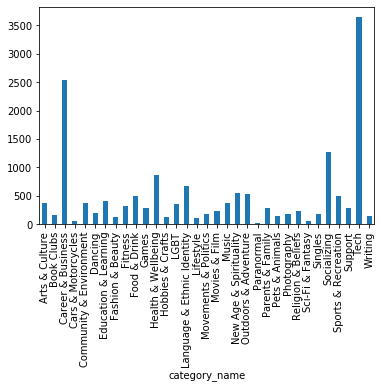

In [287]:
df.groupby('category_name').group_id.count().plot(kind='bar')

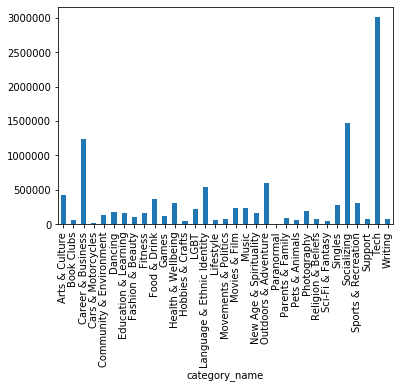

In [288]:
df.groupby('category_name').members.sum().plot(kind='bar')

### Признаки, на которые возможна ориентировка

events:
1. created
2. duration
3. updated
4. yes_rsvp_count (положительный ответ на приглашение)
5. fee.required (требуется ли плата за вход видимо)
6. event_name (создать признаки по наличию определенных слов)
7. event_description (создать признак по количеству слов в описании)

groups:
1. created (можно попробовать посчитать время от создания группы и начала ивента)
2. members (для счёта количества участников)
3. visibility (возможно открытость группы влияет на посещение)
4. who (возможно сама группа влияет на посещаемость)

venues:
1. normalised_rating (отнормированный рейтинг, возможно тоже буде влиять на посещение)

categories:
1. shortname

topics:
1. main_topic_id (взять основной топик)
2. topic_id
3. topic_name



### Расчётные характеристики

1. Дни от обновления события до его начала
2. Постоянное ли событие
3. Наличие конкретных слов в названии события
4. Количество слов в описании
5. Подсчёт "старости" группы
6. День недели + Время суток
7. Расстояние от центра города до места проведения события
8. Имеется ли у события описание

In [349]:
events_features = ['event_id', 'group_id', 'venue_id', 'created', 'duration', 'event_time',
                   'updated', 'yes_rsvp_count', 'fee.required', 
                   'event_name', 'description']
groups_features = ['group_id', 'category_id', 'created', 'members', 'visibility', 'who', 'city_id']
venues_features = ['venue_id', 'normalised_rating', 'lat', 'lon']
categories_features = ['category_id', 'shortname']
groups_topics_features = ['group_id', 'topic_id', 'topic_key']
topics_features = ['main_topic_id']
cities_features = ['city_id', 'latitude', 'longitude']

In [350]:
df = pd.merge(left=events[events_features], right=venues[venues_features], left_on='venue_id', right_on='venue_id')

In [351]:
df = pd.merge(left=df, right=groups[groups_features], left_on='group_id', right_on='group_id', suffixes=('_event', '_group'))

In [352]:
df = pd.merge(left=df, right=categories[categories_features], left_on='category_id', right_on='category_id')

In [353]:
df = pd.merge(left=df, right=cities[cities_features], left_on='city_id', right_on='city_id')

In [354]:
df['duration'] = df['duration'] / 3600

In [355]:
df['recency'] = (df['event_time'] - df['updated']).dt.days

In [356]:
df['isConstant'] = df['created_event'] == df['updated']

In [357]:
df['free'] = df.event_name.str.lower().str.contains('free')

In [358]:
df['after_party'] = df.event_name.str.lower().str.contains('after.party')

In [359]:
df['word_count'] = df['description'].str.split().str.len()

In [360]:
def get_times_of_day(x):
    if (x.hour < 12):
        return 'morning'
    elif (x.hour < 18):
        return 'day'
    else:
        return 'evening'

In [361]:
df['day_and_time'] = df['event_time'].dt.dayofweek.astype(str) + '_' + df['event_time'].apply(get_times_of_day)

In [362]:
df['distance'] = np.sqrt(np.square(df['lat'] - df['latitude']) + np.square(df['lon'] - df['longitude']))

In [363]:
df['description_not_empty'] = df['description'].isna()

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5807 entries, 0 to 5806
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   event_id               5807 non-null   object        
 1   created_event          5807 non-null   datetime64[ns]
 2   duration               5807 non-null   float64       
 3   updated                5807 non-null   datetime64[ns]
 4   yes_rsvp_count         5807 non-null   int64         
 5   fee.required           5807 non-null   bool          
 6   event_name             5757 non-null   object        
 7   normalised_rating      5807 non-null   float64       
 8   category_id            5807 non-null   object        
 9   created_group          5807 non-null   datetime64[ns]
 10  visibility             5807 non-null   object        
 11  who                    5807 non-null   object        
 12  shortname              5807 non-null   object        
 13  rec

In [365]:
df = df.drop(columns=['group_id', 'venue_id', 'event_time', 'description', 'lat', 'lon', 'members', 'city_id', 'latitude', 'longitude'])

In [367]:
corr_matrix = df.corr()

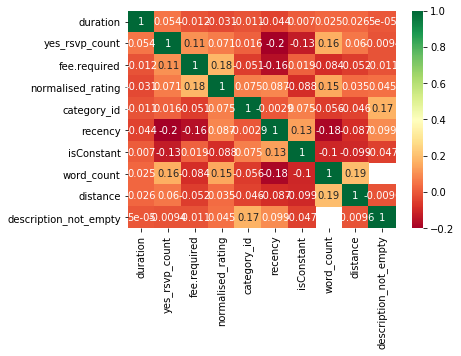

In [368]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True,cmap="RdYlGn")

In [369]:
id_columns = []

for c in df.columns:
    if 'id' in c:
        df[c] = df[c].astype('object')
        id_columns.append(c)

In [370]:
for c in df.columns:
    if df[c].nunique() == 2:
        df[c] = df[c].astype('bool')

In [371]:
df.word_count = df.word_count.fillna(0)

In [ ]:
# Todo LabelEncoder


In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = list(set(df.select_dtypes(exclude=['object', 'datetime']).columns) - set(['yes_rsvp_count']))
y = ['yes_rsvp_count']

X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
calculate_score()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X = list(set(df.select_dtypes(exclude=['object', 'datetime']).columns) - set(['yes_rsvp_count']))
y = ['yes_rsvp_count']

X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, random_state=42)

reg = GradientBoostingClassifier()
reg.fit(X_train, y_train)
calculate_score()

E:\Programms\Conda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [374]:
def calculate_score():
    from sklearn.metrics import r2_score
    y_predicted = np.trunc(reg.predict(X_test)).astype('int')
    y_predicted = list(map(lambda x: 0 if x[0] < 0 else x[0], y_predicted))
    print(r2_score(y_test, y_predicted))

In [331]:
coefficients = pd.concat([pd.DataFrame({'features':X}),pd.DataFrame(np.transpose(reg.coef_))], axis = 1)
coefficients = coefficients.rename(columns={0 : 'importance'})
coefficients = coefficients.sort_values('importance', ascending=False)

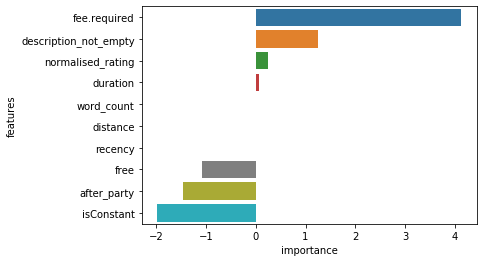

In [332]:
sns.barplot(x='importance', y='features', data=coefficients)

In [333]:
res = pd.DataFrame(y_test.yes_rsvp_count)

In [334]:
res['prediction'] = y_predicted
res = res.rename(columns={'yes_rsvp_count' : 'real'})

In [335]:
def compute_losses(serie, wholesale=5, retail=8):
    if serie < 0:
        serie = np.absolute(serie) * wholesale
    elif serie > 0:
        serie = serie * (retail - wholesale)
    return serie

In [336]:
res['losses'] = res.real - res.prediction

In [337]:
res.losses = res.losses.apply(compute_losses, args=(5, 8,))

In [338]:
res

,real,prediction,losses
501,16,10,18
3163,4,7,15
3954,2,9,35
4275,3,4,5
4898,3,3,0
...,...,...,...
2080,1,1,0
2915,1,3,10
4775,2,0,6
607,1,1,0
